<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 180.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 190.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 151.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 110.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 129.1 MB/s eta 0:00:00


## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [2]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [3]:
print(df.dtypes)

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object


In [4]:
# Display counts of non-null values in each column
print(df.count())

ResponseId             65437
MainBranch             65437
Age                    65437
Employment             65437
RemoteWork             54806
                       ...  
JobSatPoints_11        29445
SurveyLength           56182
SurveyEase             56238
ConvertedCompYearly    23435
JobSat                 29126
Length: 114, dtype: int64


In [5]:
# Display missing values for each column
print(df.isnull().sum())

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [6]:
# Write your code here
print(df.describe())

         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000   
mean         7.522140       10.060857       24.343232        22.96522   
std         18.422661       21.833836       27.089360        27.01774   
min          0.000000        0.000000        0.000000         0.00000   
25%          0.000000 

### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [7]:
# Write your code here
print(df["Country"].unique())

['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Paraguay' 'Kazakhstan' 'Slovenia' 'Jordan'
 

In [8]:
print(df["Country"].value_counts())

Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
                                                        ...  
Micronesia, Federated States of...                          1
Nauru                                                       1
Chad                                                        1
Djibouti                                                    1
Solomon Islands                                             1
Name: count, Length: 185, dtype: int64


In [9]:
print(df["Country"].isnull().sum())  # Number of missing values

6507


In [10]:
print(df[df["Country"] == ""])  # Check for empty strings

Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdmired, OfficeStackSyncHaveWorkedWith, OfficeStackSyncWan

<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [12]:
## Write your code here
edlevel_mapping = {
    "Bachelor’s degree": "Bachelor's",
    "Bachelors": "Bachelor's",
    "B.Sc.": "Bachelor's",
    "Master’s degree": "Master's",
    "Masters": "Master's",
    "M.Sc.": "Master's",
    "PhD": "Doctorate",
    "Doctoral degree": "Doctorate"
}

# Apply the mapping
df["EdLevel"] = df["EdLevel"].replace(edlevel_mapping)

### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [13]:
## Write your code here
print(df["Employment"].unique())

['Employed, full-time' 'Student, full-time'
 'Student, full-time;Not employed, but looking for work'
 'Independent contractor, freelancer, or self-employed'
 'Not employed, and not looking for work'
 'Employed, full-time;Student, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Student, full-time' 'Employed, part-time'
 'Student, full-time;Employed, part-time'
 'Student, part-time;Employed, part-time' 'I prefer not to say'
 'Not employed, but looking for work' 'Student, part-time'
 'Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time'
 'Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time'
 'Student, full-time;Not employed, but looking for work;Independent contr

In [14]:
df = pd.get_dummies(df, columns=["Employment"], prefix="Emp")

In [15]:
print(df.head())  # Check if encoding was applied

   ResponseId                      MainBranch                 Age RemoteWork  \
0           1  I am a developer by profession  Under 18 years old     Remote   
1           2  I am a developer by profession     35-44 years old     Remote   
2           3  I am a developer by profession     45-54 years old     Remote   
3           4           I am learning to code     18-24 years old        NaN   
4           5  I am a developer by profession     18-24 years old        NaN   

    Check                                   CodingActivities  \
0  Apples                                              Hobby   
1  Apples  Hobby;Contribute to open-source projects;Other...   
2  Apples  Hobby;Contribute to open-source projects;Other...   
3  Apples                                                NaN   
4  Apples                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s deg

In [16]:
print(df.columns)  

Index(['ResponseId', 'MainBranch', 'Age', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'TechDoc',
       ...
       'Emp_Student, full-time;Not employed, but looking for work;Not employed, and not looking for work;Student, part-time',
       'Emp_Student, full-time;Not employed, but looking for work;Retired',
       'Emp_Student, full-time;Not employed, but looking for work;Student, part-time',
       'Emp_Student, full-time;Retired',
       'Emp_Student, full-time;Student, part-time',
       'Emp_Student, full-time;Student, part-time;Employed, part-time',
       'Emp_Student, full-time;Student, part-time;Retired',
       'Emp_Student, part-time', 'Emp_Student, part-time;Employed, part-time',
       'Emp_Student, part-time;Retired'],
      dtype='object', length=223)


### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [17]:
## Write your code here
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values.head())  # Display top columns with missing values

AINextMuch less integrated    64289
AINextLess integrated         63082
AINextNo change               52939
AINextMuch more integrated    51999
EmbeddedAdmired               48704
dtype: int64


<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [18]:
## Write your code here
df["ConvertedCompYearly"].fillna(df["ConvertedCompYearly"].median(), inplace=True)

/tmp/ipykernel_298/3796803696.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ConvertedCompYearly"].fillna(df["ConvertedCompYearly"].median(), inplace=True)


<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [19]:
## Write your code here
df["RemoteWork"].fillna(df["RemoteWork"].mode()[0], inplace=True)

/tmp/ipykernel_298/3398006891.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["RemoteWork"].fillna(df["RemoteWork"].mode()[0], inplace=True)


### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [22]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 166.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 195.8 MB/s eta 0:00:00


In [23]:
## Write your code here
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df["ConvertedCompYearly"] = scaler.fit_transform(df[["ConvertedCompYearly"]])

<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


In [26]:
import numpy as np

In [27]:
## Write your code here
df['LogConvertedCompYearly'] = np.log1p(df['ConvertedCompYearly'])

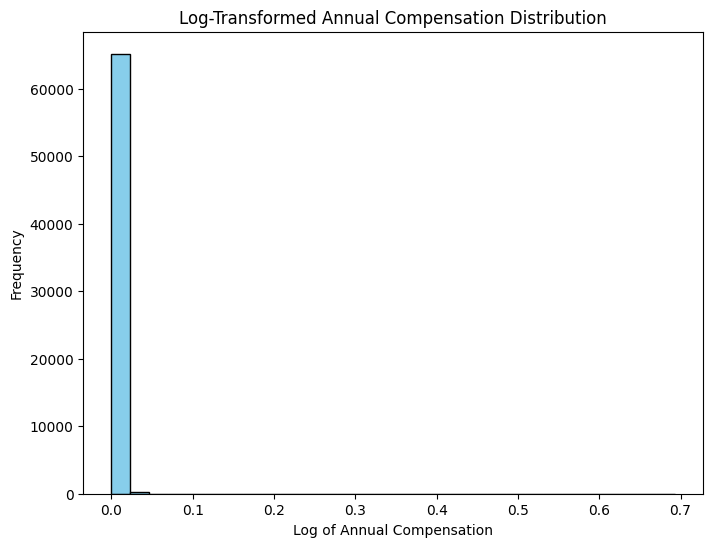

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['LogConvertedCompYearly'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title("Log-Transformed Annual Compensation Distribution")
plt.xlabel("Log of Annual Compensation")
plt.ylabel("Frequency")
plt.show()

### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


In [30]:
print(df['YearsCodePro'].unique())

[nan '17' '27' '7' '11' '25' '12' '10' '3' 'Less than 1 year' '18' '37'
 '15' '20' '6' '2' '16' '8' '14' '4' '45' '1' '24' '29' '5' '30' '26' '9'
 '33' '13' '35' '23' '22' '31' '19' '21' '28' '34' '32' '40' '50' '39'
 '44' '42' '41' '36' '38' 'More than 50 years' '43' '47' '48' '46' '49']


In [31]:
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0.5',  # Replace with string '0.5' for now
    'More than 50 years': '51'  # Replace with string '51' for now
})

In [32]:
# Convert the column to numeric, coercing errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

In [33]:
median_years = df['YearsCodePro'].median()

# Fill missing values with the median
df['YearsCodePro'].fillna(median_years, inplace=True)

/tmp/ipykernel_298/2520632175.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsCodePro'].fillna(median_years, inplace=True)


In [34]:
bins = [-1, 2, 5, 10, float('inf')]  # Bin edges
labels = ['Beginner', 'Intermediate', 'Advanced', 'Expert']  # Labels for each bin

# Create the ExperienceLevel column
df['ExperienceLevel'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=True)


In [35]:
# Verify the results
print(df[['YearsCodePro', 'ExperienceLevel']].head())

   YearsCodePro ExperienceLevel
0           7.0        Advanced
1          17.0          Expert
2          27.0          Expert
3           7.0        Advanced
4           7.0        Advanced


### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
